In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
df0=pd.read_csv('/content/drive/MyDrive/features.csv')
df1=pd.read_csv('/content/drive/MyDrive/power.csv')
df1.tail()

,Timestamp,Power(kW)
136725,2021-08-14 23:10:00,2757.728271
136726,2021-08-14 23:20:00,2758.323242
136727,2021-08-14 23:30:00,2759.243408
136728,2021-08-14 23:40:00,2761.261719
136729,2021-08-14 23:50:00,2758.593262


In [ ]:
df=df0.merge(df1, how='inner', on='Timestamp')
# df.tail(5)
df[12000:12006]  

,Timestamp,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,...,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,Power(kW)
12000,2019-03-26 15:00:00,29.918333,30.531666,28.885000,30.395000,23.584162,31.215000,16.695858,22.000000,49.583332,...,2.113795,1.952327,2.011047,1.731741,NaN,2.881961,5.888560,1.693333,5.917824,-18.451666
12001,2019-03-26 15:10:00,31.879999,32.544998,29.955000,31.629999,23.430067,32.494999,15.542374,22.146667,50.000000,...,0.246897,0.000000,0.089877,-0.336773,NaN,16.420889,5.877352,1.000000,5.914578,3.318333
12002,2019-03-26 15:20:00,33.465000,34.231667,30.971666,32.645000,34.952438,33.439999,16.834276,23.000000,50.000000,...,0.246897,0.000000,0.089877,-0.336773,NaN,30.092041,5.865854,1.000000,5.910227,46.506668
12003,2019-03-26 15:30:00,36.508335,37.246666,32.570000,34.090000,55.998398,35.291668,27.663843,23.000000,50.000000,...,0.246897,0.000000,0.089877,-0.336773,NaN,18.401083,5.857502,1.000000,5.895942,172.866669
12004,2019-03-26 15:40:00,39.091667,40.398335,34.491665,36.173332,50.702705,37.693333,31.757063,23.756666,50.360001,...,0.246897,0.000000,0.089877,-0.336773,NaN,28.505899,5.822761,1.000000,5.866086,363.533325
12005,2019-03-26 15:50:00,42.436668,42.983334,36.696667,38.953335,47.086731,40.598331,25.574389,25.056667,51.000000,...,0.246897,0.000000,0.089877,-0.336773,NaN,7.393946,5.804494,1.000000,5.836015,551.455017


In [ ]:
df.isnull().sum()

Timestamp                                             0
Gearbox_T1_High_Speed_Shaft_Temperature            3951
Gearbox_T3_High_Speed_Shaft_Temperature            4292
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    3664
Temperature Gearbox Bearing Hollow Shaft           3264
                                                   ... 
Moment Q Filltered                                 4611
Proxy Sensor_Degree-45                             3536
Turbine State                                      3536
Proxy Sensor_Degree-315                            4058
Power(kW)                                             0
Length: 78, dtype: int64

In [ ]:
df2=df[:200]
df2.mean(axis = 0, skipna = True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Gearbox_T1_High_Speed_Shaft_Temperature              60.372158
Gearbox_T3_High_Speed_Shaft_Temperature              62.701642
Gearbox_T1_Intermediate_Speed_Shaft_Temperature      55.792733
Temperature Gearbox Bearing Hollow Shaft             60.353133
Tower Acceleration Normal                            59.286621
                                                      ...     
Moment Q Filltered                                  -27.646304
Proxy Sensor_Degree-45                                5.735477
Turbine State                                         1.044883
Proxy Sensor_Degree-315                               5.752687
Power(kW)                                          1512.471769
Length: 77, dtype: float64

In [ ]:
sum([True for idx,row in df.iterrows() if any(row.isnull())])

121146

In [ ]:

df.fillna(df[:100].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
df.isnull().sum()

Timestamp                                          0
Gearbox_T1_High_Speed_Shaft_Temperature            0
Gearbox_T3_High_Speed_Shaft_Temperature            0
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    0
Temperature Gearbox Bearing Hollow Shaft           0
                                                  ..
Moment Q Filltered                                 0
Proxy Sensor_Degree-45                             0
Turbine State                                      0
Proxy Sensor_Degree-315                            0
Power(kW)                                          0
Length: 78, dtype: int64

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df0=pd.read_csv('/content/drive/MyDrive/features.csv')
df1=pd.read_csv('/content/drive/MyDrive/power.csv')
df1.tail()

,Timestamp,Power(kW)
136725,2021-08-14 23:10:00,2757.728271
136726,2021-08-14 23:20:00,2758.323242
136727,2021-08-14 23:30:00,2759.243408
136728,2021-08-14 23:40:00,2761.261719
136729,2021-08-14 23:50:00,2758.593262


In [ ]:
df=df0.merge(df1, how='inner', on='Timestamp')
# df.tail(5)
df[12000:12006]  

,Timestamp,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,...,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,Power(kW)
12000,2019-03-26 15:00:00,29.918333,30.531666,28.885000,30.395000,23.584162,31.215000,16.695858,22.000000,49.583332,...,2.113795,1.952327,2.011047,1.731741,NaN,2.881961,5.888560,1.693333,5.917824,-18.451666
12001,2019-03-26 15:10:00,31.879999,32.544998,29.955000,31.629999,23.430067,32.494999,15.542374,22.146667,50.000000,...,0.246897,0.000000,0.089877,-0.336773,NaN,16.420889,5.877352,1.000000,5.914578,3.318333
12002,2019-03-26 15:20:00,33.465000,34.231667,30.971666,32.645000,34.952438,33.439999,16.834276,23.000000,50.000000,...,0.246897,0.000000,0.089877,-0.336773,NaN,30.092041,5.865854,1.000000,5.910227,46.506668
12003,2019-03-26 15:30:00,36.508335,37.246666,32.570000,34.090000,55.998398,35.291668,27.663843,23.000000,50.000000,...,0.246897,0.000000,0.089877,-0.336773,NaN,18.401083,5.857502,1.000000,5.895942,172.866669
12004,2019-03-26 15:40:00,39.091667,40.398335,34.491665,36.173332,50.702705,37.693333,31.757063,23.756666,50.360001,...,0.246897,0.000000,0.089877,-0.336773,NaN,28.505899,5.822761,1.000000,5.866086,363.533325
12005,2019-03-26 15:50:00,42.436668,42.983334,36.696667,38.953335,47.086731,40.598331,25.574389,25.056667,51.000000,...,0.246897,0.000000,0.089877,-0.336773,NaN,7.393946,5.804494,1.000000,5.836015,551.455017


In [ ]:
df.isnull().sum()

Timestamp                                             0
Gearbox_T1_High_Speed_Shaft_Temperature            3951
Gearbox_T3_High_Speed_Shaft_Temperature            4292
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    3664
Temperature Gearbox Bearing Hollow Shaft           3264
                                                   ... 
Moment Q Filltered                                 4611
Proxy Sensor_Degree-45                             3536
Turbine State                                      3536
Proxy Sensor_Degree-315                            4058
Power(kW)                                             0
Length: 78, dtype: int64

In [ ]:
df2=df[:300]
df2.mean(axis = 0, skipna = True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Gearbox_T1_High_Speed_Shaft_Temperature              53.621906
Gearbox_T3_High_Speed_Shaft_Temperature              55.982933
Gearbox_T1_Intermediate_Speed_Shaft_Temperature      49.593950
Temperature Gearbox Bearing Hollow Shaft             54.790606
Tower Acceleration Normal                            54.000615
                                                      ...     
Moment Q Filltered                                   -5.919748
Proxy Sensor_Degree-45                                5.767731
Turbine State                                         1.127022
Proxy Sensor_Degree-315                               5.794534
Power(kW)                                          1049.082974
Length: 77, dtype: float64

In [ ]:
# sum([True for idx,row in df.iterrows() if any(row.isnull())])

121146

In [ ]:

df.fillna(df[:200].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
df.isnull().sum()

Timestamp                                          0
Gearbox_T1_High_Speed_Shaft_Temperature            0
Gearbox_T3_High_Speed_Shaft_Temperature            0
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    0
Temperature Gearbox Bearing Hollow Shaft           0
                                                  ..
Moment Q Filltered                                 0
Proxy Sensor_Degree-45                             0
Turbine State                                      0
Proxy Sensor_Degree-315                            0
Power(kW)                                          0
Length: 78, dtype: int64

In [ ]:
df.index = pd.to_datetime(df['Timestamp'], format='%Y.%m.%d %H:%M:%S')
df[:26]
df4=df

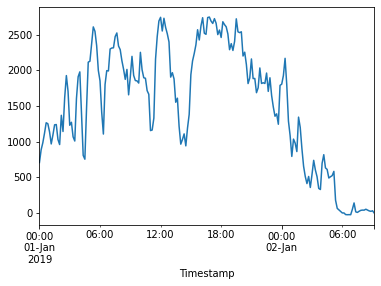

In [ ]:
dff=df[:200]
power=dff["Power(kW)"]
power.plot()

In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# results = seasonal_decompose(df['Power(kW)'])
# results.plot();

In [ ]:
dd=df[:]
powers=df["Power(kW)"]
df1.pop('Timestamp')
df=df1

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(powers, WINDOW_SIZE)
X1.shape, y1.shape

((136725, 5, 1), (136725,))

In [ ]:
X_train1, y_train1 = X1[:18000], y1[:18000]
X_val1, y_val1 = X1[18000:20000], y1[18000:20000]
X_test1, y_test1 = X1[20000:], y1[20000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((18000, 5, 1), (18000,), (2000, 5, 1), (2000,), (116725, 5, 1), (116725,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(100))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 8)                 808       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 41,617
Trainable params: 41,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)


model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp1])


Epoch 1/50
558/563 [============================>.] - ETA: 0s - loss: 2311558.5000 - root_mean_squared_error: 1520.3810

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 12s 11ms/step - loss: 2308366.0000 - root_mean_squared_error: 1519.3308 - val_loss: 284157.0312 - val_root_mean_squared_error: 533.0638
Epoch 2/50
552/563 [============================>.] - ETA: 0s - loss: 1517429.6250 - root_mean_squared_error: 1231.8398

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 10ms/step - loss: 1508938.2500 - root_mean_squared_error: 1228.3884 - val_loss: 124950.1172 - val_root_mean_squared_error: 353.4828
Epoch 3/50
550/563 [============================>.] - ETA: 0s - loss: 732724.0000 - root_mean_squared_error: 855.9930

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 11ms/step - loss: 726218.8750 - root_mean_squared_error: 852.1848 - val_loss: 50562.4805 - val_root_mean_squared_error: 224.8610
Epoch 4/50
556/563 [============================>.] - ETA: 0s - loss: 273113.4375 - root_mean_squared_error: 522.6025

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 10ms/step - loss: 272022.3438 - root_mean_squared_error: 521.5576 - val_loss: 38330.4023 - val_root_mean_squared_error: 195.7815
Epoch 5/50
555/563 [============================>.] - ETA: 0s - loss: 108413.7812 - root_mean_squared_error: 329.2625

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 11ms/step - loss: 108098.1250 - root_mean_squared_error: 328.7828 - val_loss: 36281.6289 - val_root_mean_squared_error: 190.4774
Epoch 6/50
563/563 [==============================] - 2s 4ms/step - loss: 60869.4844 - root_mean_squared_error: 246.7174 - val_loss: 37209.8203 - val_root_mean_squared_error: 192.8985
Epoch 7/50
558/563 [============================>.] - ETA: 0s - loss: 47938.2344 - root_mean_squared_error: 218.9480

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 11ms/step - loss: 48096.6602 - root_mean_squared_error: 219.3095 - val_loss: 34985.8008 - val_root_mean_squared_error: 187.0449
Epoch 8/50
560/563 [============================>.] - ETA: 0s - loss: 45779.8750 - root_mean_squared_error: 213.9623

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 11ms/step - loss: 45755.4570 - root_mean_squared_error: 213.9052 - val_loss: 34798.3555 - val_root_mean_squared_error: 186.5432
Epoch 9/50
563/563 [==============================] - 3s 6ms/step - loss: 48337.7891 - root_mean_squared_error: 219.8586 - val_loss: 36231.2734 - val_root_mean_squared_error: 190.3451
Epoch 10/50
563/563 [==============================] - 2s 4ms/step - loss: 45906.2188 - root_mean_squared_error: 214.2574 - val_loss: 35556.4062 - val_root_mean_squared_error: 188.5641
Epoch 11/50
563/563 [==============================] - 2s 4ms/step - loss: 44710.4453 - root_mean_squared_error: 211.4484 - val_loss: 37639.4883 - val_root_mean_squared_error: 194.0090
Epoch 12/50
563/563 [==============================] - 2s 4ms/step - loss: 43947.9805 - root_mean_squared_error: 209.6377 - val_loss: 35339.7617 - val_root_mean_squared_error: 187.9887
Epoch 13/50
563/563 [==============================] - 2s 4ms/step - loss: 44636.4023 -

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 11ms/step - loss: 43730.5742 - root_mean_squared_error: 209.1186 - val_loss: 34480.8906 - val_root_mean_squared_error: 185.6903
Epoch 19/50
563/563 [==============================] - 2s 4ms/step - loss: 44332.2188 - root_mean_squared_error: 210.5522 - val_loss: 36013.0977 - val_root_mean_squared_error: 189.7712
Epoch 20/50
563/563 [==============================] - 2s 4ms/step - loss: 44392.7500 - root_mean_squared_error: 210.6959 - val_loss: 37964.3164 - val_root_mean_squared_error: 194.8443
Epoch 21/50
563/563 [==============================] - 2s 4ms/step - loss: 45279.1367 - root_mean_squared_error: 212.7889 - val_loss: 40174.1562 - val_root_mean_squared_error: 200.4349
Epoch 22/50
563/563 [==============================] - 2s 4ms/step - loss: 44753.7891 - root_mean_squared_error: 211.5509 - val_loss: 36661.9062 - val_root_mean_squared_error: 191.4730
Epoch 23/50
563/563 [==============================] - 2s 4ms/step - loss: 43279.9922 

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 11ms/step - loss: 43783.7773 - root_mean_squared_error: 209.2457 - val_loss: 34336.4805 - val_root_mean_squared_error: 185.3011
Epoch 25/50
563/563 [==============================] - 2s 4ms/step - loss: 42849.4844 - root_mean_squared_error: 207.0012 - val_loss: 37045.8906 - val_root_mean_squared_error: 192.4731
Epoch 26/50
563/563 [==============================] - 2s 4ms/step - loss: 43040.6211 - root_mean_squared_error: 207.4623 - val_loss: 38814.9141 - val_root_mean_squared_error: 197.0150
Epoch 27/50
563/563 [==============================] - 2s 4ms/step - loss: 43519.6836 - root_mean_squared_error: 208.6137 - val_loss: 35529.9727 - val_root_mean_squared_error: 188.4940
Epoch 28/50
563/563 [==============================] - 2s 4ms/step - loss: 43146.1016 - root_mean_squared_error: 207.7164 - val_loss: 37031.9688 - val_root_mean_squared_error: 192.4369
Epoch 29/50
563/563 [==============================] - 2s 4ms/step - loss: 44054.9297 

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,1265.334961,1249.811646
1,1222.454346,1136.536621
2,1112.531616,966.803345
3,927.189575,1091.823364
4,1130.577148,1234.765015
...,...,...
17995,1847.729370,1947.505005
17996,1931.778442,1498.800049
17997,1427.650391,1777.474976
17998,1805.654541,1981.046631


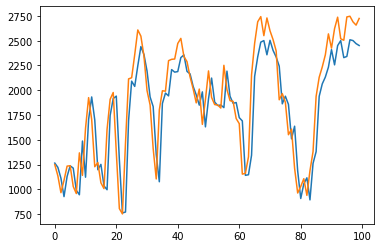

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])
plt.figsize=(12,24)


In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(        Predictions      Actuals
 0       1507.796143  1291.194946
 1       1252.584106   538.618347
 2        522.453735   427.054993
 3        420.216003   553.721680
 4        597.137451   313.158325
 ...             ...          ...
 116720  2506.795166  2757.728271
 116721  2506.371826  2758.323242
 116722  2506.654053  2759.243408
 116723  2507.030762  2761.261719
 116724  2507.862549  2758.593262
 
 [116725 rows x 2 columns], 47359.50630692494)

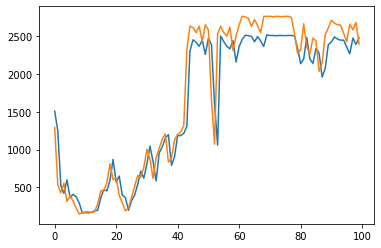

In [ ]:
plot_predictions1(model1, X_test1, y_test1)

In [ ]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 2056      
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 2056      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp2])

Epoch 1/50
563/563 [==============================] - ETA: 0s - loss: 69899.0078 - root_mean_squared_error: 264.3842INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


563/563 [==============================] - 9s 4ms/step - loss: 69899.0078 - root_mean_squared_error: 264.3842 - val_loss: 35619.9805 - val_root_mean_squared_error: 188.7326
Epoch 2/50
563/563 [==============================] - 2s 3ms/step - loss: 41447.8984 - root_mean_squared_error: 203.5876 - val_loss: 36286.7422 - val_root_mean_squared_error: 190.4908
Epoch 3/50
558/563 [============================>.] - ETA: 0s - loss: 42082.7070 - root_mean_squared_error: 205.1407INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


563/563 [==============================] - 2s 4ms/step - loss: 42015.7031 - root_mean_squared_error: 204.9773 - val_loss: 34855.3203 - val_root_mean_squared_error: 186.6958
Epoch 4/50
563/563 [==============================] - 2s 3ms/step - loss: 42003.4258 - root_mean_squared_error: 204.9474 - val_loss: 34884.2344 - val_root_mean_squared_error: 186.7732
Epoch 5/50
563/563 [==============================] - 2s 3ms/step - loss: 41245.7734 - root_mean_squared_error: 203.0906 - val_loss: 36237.8281 - val_root_mean_squared_error: 190.3624
Epoch 6/50
563/563 [==============================] - 2s 3ms/step - loss: 41398.6758 - root_mean_squared_error: 203.4666 - val_loss: 36078.7891 - val_root_mean_squared_error: 189.9442
Epoch 7/50
549/563 [============================>.] - ETA: 0s - loss: 41184.5430 - root_mean_squared_error: 202.9397INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


563/563 [==============================] - 2s 4ms/step - loss: 41133.5664 - root_mean_squared_error: 202.8141 - val_loss: 34180.6719 - val_root_mean_squared_error: 184.8802
Epoch 8/50
563/563 [==============================] - 2s 3ms/step - loss: 40827.7656 - root_mean_squared_error: 202.0588 - val_loss: 34963.1758 - val_root_mean_squared_error: 186.9844
Epoch 9/50
563/563 [==============================] - 2s 3ms/step - loss: 40601.8945 - root_mean_squared_error: 201.4991 - val_loss: 34680.5156 - val_root_mean_squared_error: 186.2271
Epoch 10/50
563/563 [==============================] - 2s 3ms/step - loss: 40880.2695 - root_mean_squared_error: 202.1887 - val_loss: 35097.4219 - val_root_mean_squared_error: 187.3431
Epoch 11/50
553/563 [============================>.] - ETA: 0s - loss: 40343.9883 - root_mean_squared_error: 200.8581INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


563/563 [==============================] - 2s 4ms/step - loss: 40149.2969 - root_mean_squared_error: 200.3729 - val_loss: 34026.2148 - val_root_mean_squared_error: 184.4620
Epoch 12/50
563/563 [==============================] - 2s 3ms/step - loss: 40648.1367 - root_mean_squared_error: 201.6138 - val_loss: 34242.7891 - val_root_mean_squared_error: 185.0481
Epoch 13/50
563/563 [==============================] - 2s 3ms/step - loss: 40198.0664 - root_mean_squared_error: 200.4946 - val_loss: 34433.9805 - val_root_mean_squared_error: 185.5639
Epoch 14/50
563/563 [==============================] - 2s 3ms/step - loss: 40555.5078 - root_mean_squared_error: 201.3840 - val_loss: 34435.4570 - val_root_mean_squared_error: 185.5679
Epoch 15/50
554/563 [============================>.] - ETA: 0s - loss: 39889.7969 - root_mean_squared_error: 199.7243INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


563/563 [==============================] - 2s 4ms/step - loss: 40138.3320 - root_mean_squared_error: 200.3455 - val_loss: 33906.2578 - val_root_mean_squared_error: 184.1365
Epoch 16/50
563/563 [==============================] - 2s 3ms/step - loss: 40154.8398 - root_mean_squared_error: 200.3867 - val_loss: 36362.2227 - val_root_mean_squared_error: 190.6888
Epoch 17/50
559/563 [============================>.] - ETA: 0s - loss: 39633.4414 - root_mean_squared_error: 199.0815INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


563/563 [==============================] - 2s 4ms/step - loss: 39718.6562 - root_mean_squared_error: 199.2954 - val_loss: 33768.2617 - val_root_mean_squared_error: 183.7614
Epoch 18/50
563/563 [==============================] - 2s 3ms/step - loss: 39699.2227 - root_mean_squared_error: 199.2466 - val_loss: 33885.8438 - val_root_mean_squared_error: 184.0811
Epoch 19/50
563/563 [==============================] - 2s 3ms/step - loss: 39797.8047 - root_mean_squared_error: 199.4939 - val_loss: 35957.5625 - val_root_mean_squared_error: 189.6248
Epoch 20/50
563/563 [==============================] - 2s 3ms/step - loss: 39701.6055 - root_mean_squared_error: 199.2526 - val_loss: 34501.9883 - val_root_mean_squared_error: 185.7471
Epoch 21/50
563/563 [==============================] - 2s 3ms/step - loss: 39688.9883 - root_mean_squared_error: 199.2209 - val_loss: 35198.9961 - val_root_mean_squared_error: 187.6140
Epoch 22/50
563/563 [==============================] - 2s 3ms/step - loss: 39614.9883 -

INFO:tensorflow:Assets written to: model2/assets


563/563 [==============================] - 2s 4ms/step - loss: 39783.6055 - root_mean_squared_error: 199.4583 - val_loss: 33652.9531 - val_root_mean_squared_error: 183.4474
Epoch 27/50
563/563 [==============================] - 2s 3ms/step - loss: 39529.6445 - root_mean_squared_error: 198.8206 - val_loss: 34127.8203 - val_root_mean_squared_error: 184.7372
Epoch 28/50
563/563 [==============================] - 2s 3ms/step - loss: 39579.1172 - root_mean_squared_error: 198.9450 - val_loss: 34952.0586 - val_root_mean_squared_error: 186.9547
Epoch 29/50
563/563 [==============================] - 2s 3ms/step - loss: 39854.5273 - root_mean_squared_error: 199.6360 - val_loss: 34164.4336 - val_root_mean_squared_error: 184.8362
Epoch 30/50
563/563 [==============================] - 2s 3ms/step - loss: 39746.4180 - root_mean_squared_error: 199.3650 - val_loss: 34593.7891 - val_root_mean_squared_error: 185.9940
Epoch 31/50
563/563 [==============================] - 2s 3ms/step - loss: 39799.6641 -

INFO:tensorflow:Assets written to: model2/assets


563/563 [==============================] - 2s 4ms/step - loss: 39360.0820 - root_mean_squared_error: 198.3938 - val_loss: 33509.8906 - val_root_mean_squared_error: 183.0571
Epoch 47/50
563/563 [==============================] - 2s 3ms/step - loss: 39383.0430 - root_mean_squared_error: 198.4516 - val_loss: 33862.1836 - val_root_mean_squared_error: 184.0168
Epoch 48/50
563/563 [==============================] - 2s 3ms/step - loss: 39299.6719 - root_mean_squared_error: 198.2415 - val_loss: 34780.2383 - val_root_mean_squared_error: 186.4946
Epoch 49/50
563/563 [==============================] - 2s 3ms/step - loss: 39210.7891 - root_mean_squared_error: 198.0172 - val_loss: 34478.6016 - val_root_mean_squared_error: 185.6841
Epoch 50/50
563/563 [==============================] - 2s 3ms/step - loss: 39298.8945 - root_mean_squared_error: 198.2395 - val_loss: 33945.5078 - val_root_mean_squared_error: 184.2431


In [ ]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp3])

Epoch 1/50
551/563 [============================>.] - ETA: 0s - loss: 2517524.0000 - root_mean_squared_error: 1586.6708

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 8s 11ms/step - loss: 2514559.7500 - root_mean_squared_error: 1585.7363 - val_loss: 426841.0000 - val_root_mean_squared_error: 653.3307
Epoch 2/50
557/563 [============================>.] - ETA: 0s - loss: 2503234.5000 - root_mean_squared_error: 1582.1614

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 11ms/step - loss: 2506521.2500 - root_mean_squared_error: 1583.1997 - val_loss: 422602.9375 - val_root_mean_squared_error: 650.0792
Epoch 3/50
554/563 [============================>.] - ETA: 0s - loss: 2492773.2500 - root_mean_squared_error: 1578.8518

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 2492575.5000 - root_mean_squared_error: 1578.7892 - val_loss: 418951.8438 - val_root_mean_squared_error: 647.2649
Epoch 4/50
557/563 [============================>.] - ETA: 0s - loss: 2477299.7500 - root_mean_squared_error: 1573.9440

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 2480277.5000 - root_mean_squared_error: 1574.8896 - val_loss: 415424.3750 - val_root_mean_squared_error: 644.5342
Epoch 5/50
554/563 [============================>.] - ETA: 0s - loss: 2465382.0000 - root_mean_squared_error: 1570.1534

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 2468422.2500 - root_mean_squared_error: 1571.1213 - val_loss: 412004.7188 - val_root_mean_squared_error: 641.8759
Epoch 6/50
559/563 [============================>.] - ETA: 0s - loss: 2454971.5000 - root_mean_squared_error: 1566.8348

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 2456307.7500 - root_mean_squared_error: 1567.2612 - val_loss: 408441.1875 - val_root_mean_squared_error: 639.0941
Epoch 7/50
562/563 [============================>.] - ETA: 0s - loss: 2443875.7500 - root_mean_squared_error: 1563.2900

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 2443543.2500 - root_mean_squared_error: 1563.1837 - val_loss: 404704.9375 - val_root_mean_squared_error: 636.1642
Epoch 8/50
558/563 [============================>.] - ETA: 0s - loss: 2426098.7500 - root_mean_squared_error: 1557.5939

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 2430079.2500 - root_mean_squared_error: 1558.8711 - val_loss: 400793.1875 - val_root_mean_squared_error: 633.0823
Epoch 9/50
553/563 [============================>.] - ETA: 0s - loss: 2416878.2500 - root_mean_squared_error: 1554.6312

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 2415830.2500 - root_mean_squared_error: 1554.2942 - val_loss: 396185.8125 - val_root_mean_squared_error: 629.4329
Epoch 10/50
553/563 [============================>.] - ETA: 0s - loss: 2399466.2500 - root_mean_squared_error: 1549.0210

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 2397722.5000 - root_mean_squared_error: 1548.4580 - val_loss: 391489.9062 - val_root_mean_squared_error: 625.6915
Epoch 11/50
562/563 [============================>.] - ETA: 0s - loss: 2381370.0000 - root_mean_squared_error: 1543.1688

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 2381290.5000 - root_mean_squared_error: 1543.1431 - val_loss: 386909.5625 - val_root_mean_squared_error: 622.0206
Epoch 12/50
562/563 [============================>.] - ETA: 0s - loss: 2365550.7500 - root_mean_squared_error: 1538.0347

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 2364330.0000 - root_mean_squared_error: 1537.6377 - val_loss: 382185.0938 - val_root_mean_squared_error: 618.2112
Epoch 13/50
556/563 [============================>.] - ETA: 0s - loss: 2346129.2500 - root_mean_squared_error: 1531.7080

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 2345880.0000 - root_mean_squared_error: 1531.6266 - val_loss: 376905.6250 - val_root_mean_squared_error: 613.9264
Epoch 14/50
554/563 [============================>.] - ETA: 0s - loss: 2325411.7500 - root_mean_squared_error: 1524.9301

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 10ms/step - loss: 2325214.0000 - root_mean_squared_error: 1524.8652 - val_loss: 371310.9688 - val_root_mean_squared_error: 609.3529
Epoch 15/50
552/563 [============================>.] - ETA: 0s - loss: 2303544.0000 - root_mean_squared_error: 1517.7430

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 2305010.0000 - root_mean_squared_error: 1518.2260 - val_loss: 366038.3438 - val_root_mean_squared_error: 605.0110
Epoch 16/50
560/563 [============================>.] - ETA: 0s - loss: 2287223.7500 - root_mean_squared_error: 1512.3571

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 2284790.7500 - root_mean_squared_error: 1511.5525 - val_loss: 360665.8125 - val_root_mean_squared_error: 600.5546
Epoch 17/50
560/563 [============================>.] - ETA: 0s - loss: 2265325.2500 - root_mean_squared_error: 1505.0997

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 2263959.7500 - root_mean_squared_error: 1504.6460 - val_loss: 355189.5312 - val_root_mean_squared_error: 595.9778
Epoch 18/50
549/563 [============================>.] - ETA: 0s - loss: 2242551.2500 - root_mean_squared_error: 1497.5150

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 2242515.7500 - root_mean_squared_error: 1497.5032 - val_loss: 349615.9375 - val_root_mean_squared_error: 591.2833
Epoch 19/50
550/563 [============================>.] - ETA: 0s - loss: 2218498.7500 - root_mean_squared_error: 1489.4625

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 2220536.2500 - root_mean_squared_error: 1490.1464 - val_loss: 343985.7812 - val_root_mean_squared_error: 586.5030
Epoch 20/50
556/563 [============================>.] - ETA: 0s - loss: 2200452.5000 - root_mean_squared_error: 1483.3922

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 2197996.7500 - root_mean_squared_error: 1482.5642 - val_loss: 338245.7500 - val_root_mean_squared_error: 581.5890
Epoch 21/50
552/563 [============================>.] - ETA: 0s - loss: 2174869.7500 - root_mean_squared_error: 1474.7439

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 2174878.7500 - root_mean_squared_error: 1474.7469 - val_loss: 332450.9688 - val_root_mean_squared_error: 576.5856
Epoch 22/50
553/563 [============================>.] - ETA: 0s - loss: 2155698.5000 - root_mean_squared_error: 1468.2297

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 2151227.0000 - root_mean_squared_error: 1466.7062 - val_loss: 326578.1875 - val_root_mean_squared_error: 571.4702
Epoch 23/50
553/563 [============================>.] - ETA: 0s - loss: 2128076.5000 - root_mean_squared_error: 1458.7928

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 2127034.5000 - root_mean_squared_error: 1458.4357 - val_loss: 320652.5938 - val_root_mean_squared_error: 566.2619
Epoch 24/50
561/563 [============================>.] - ETA: 0s - loss: 2102925.5000 - root_mean_squared_error: 1450.1467

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 2102319.0000 - root_mean_squared_error: 1449.9375 - val_loss: 314674.2812 - val_root_mean_squared_error: 560.9584
Epoch 25/50
551/563 [============================>.] - ETA: 0s - loss: 2077127.7500 - root_mean_squared_error: 1441.2244

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 2077122.7500 - root_mean_squared_error: 1441.2227 - val_loss: 308657.0312 - val_root_mean_squared_error: 555.5691
Epoch 26/50
562/563 [============================>.] - ETA: 0s - loss: 2052283.2500 - root_mean_squared_error: 1432.5792

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 2051434.7500 - root_mean_squared_error: 1432.2831 - val_loss: 302592.5000 - val_root_mean_squared_error: 550.0840
Epoch 27/50
561/563 [============================>.] - ETA: 0s - loss: 2024477.0000 - root_mean_squared_error: 1422.8412

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 7s 12ms/step - loss: 2025291.1250 - root_mean_squared_error: 1423.1272 - val_loss: 296516.1875 - val_root_mean_squared_error: 544.5330
Epoch 28/50
561/563 [============================>.] - ETA: 0s - loss: 1998368.8750 - root_mean_squared_error: 1413.6368

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 1998744.5000 - root_mean_squared_error: 1413.7697 - val_loss: 290422.2812 - val_root_mean_squared_error: 538.9084
Epoch 29/50
554/563 [============================>.] - ETA: 0s - loss: 1970280.0000 - root_mean_squared_error: 1403.6666

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 1971806.2500 - root_mean_squared_error: 1404.2102 - val_loss: 284316.8750 - val_root_mean_squared_error: 533.2137
Epoch 30/50
560/563 [============================>.] - ETA: 0s - loss: 1944309.0000 - root_mean_squared_error: 1394.3848

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 1944413.5000 - root_mean_squared_error: 1394.4222 - val_loss: 278200.8125 - val_root_mean_squared_error: 527.4474
Epoch 31/50
556/563 [============================>.] - ETA: 0s - loss: 1919714.5000 - root_mean_squared_error: 1385.5376

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 1916660.6250 - root_mean_squared_error: 1384.4351 - val_loss: 272089.2188 - val_root_mean_squared_error: 521.6217
Epoch 32/50
554/563 [============================>.] - ETA: 0s - loss: 1884815.1250 - root_mean_squared_error: 1372.8856

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 1888568.8750 - root_mean_squared_error: 1374.2521 - val_loss: 265987.9062 - val_root_mean_squared_error: 515.7402
Epoch 33/50
563/563 [==============================] - ETA: 0s - loss: 1860080.2500 - root_mean_squared_error: 1363.8475

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 1860080.2500 - root_mean_squared_error: 1363.8475 - val_loss: 259906.4531 - val_root_mean_squared_error: 509.8102
Epoch 34/50
558/563 [============================>.] - ETA: 0s - loss: 1829749.0000 - root_mean_squared_error: 1352.6821

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 1831330.8750 - root_mean_squared_error: 1353.2667 - val_loss: 253834.1250 - val_root_mean_squared_error: 503.8195
Epoch 35/50
561/563 [============================>.] - ETA: 0s - loss: 1802644.8750 - root_mean_squared_error: 1342.6261

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 1802271.0000 - root_mean_squared_error: 1342.4868 - val_loss: 247759.4531 - val_root_mean_squared_error: 497.7544
Epoch 36/50
559/563 [============================>.] - ETA: 0s - loss: 1773487.1250 - root_mean_squared_error: 1331.7234

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 1772939.5000 - root_mean_squared_error: 1331.5177 - val_loss: 241736.7344 - val_root_mean_squared_error: 491.6673
Epoch 37/50
555/563 [============================>.] - ETA: 0s - loss: 1743727.7500 - root_mean_squared_error: 1320.5028

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 1743365.6250 - root_mean_squared_error: 1320.3657 - val_loss: 235776.9688 - val_root_mean_squared_error: 485.5687
Epoch 38/50
558/563 [============================>.] - ETA: 0s - loss: 1712303.2500 - root_mean_squared_error: 1308.5500

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 1713533.5000 - root_mean_squared_error: 1309.0200 - val_loss: 229841.8281 - val_root_mean_squared_error: 479.4182
Epoch 39/50
553/563 [============================>.] - ETA: 0s - loss: 1683229.5000 - root_mean_squared_error: 1297.3933

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 1683501.3750 - root_mean_squared_error: 1297.4982 - val_loss: 223933.2656 - val_root_mean_squared_error: 473.2159
Epoch 40/50
563/563 [==============================] - ETA: 0s - loss: 1653255.3750 - root_mean_squared_error: 1285.7898

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 1653255.3750 - root_mean_squared_error: 1285.7898 - val_loss: 218014.6875 - val_root_mean_squared_error: 466.9204
Epoch 41/50
553/563 [============================>.] - ETA: 0s - loss: 1622636.6250 - root_mean_squared_error: 1273.8275

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 1622860.1250 - root_mean_squared_error: 1273.9153 - val_loss: 212204.6094 - val_root_mean_squared_error: 460.6567
Epoch 42/50
553/563 [============================>.] - ETA: 0s - loss: 1592704.3750 - root_mean_squared_error: 1262.0239

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 1592293.7500 - root_mean_squared_error: 1261.8612 - val_loss: 206457.3281 - val_root_mean_squared_error: 454.3758
Epoch 43/50
552/563 [============================>.] - ETA: 0s - loss: 1559158.5000 - root_mean_squared_error: 1248.6627

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 1561621.6250 - root_mean_squared_error: 1249.6486 - val_loss: 200810.4219 - val_root_mean_squared_error: 448.1187
Epoch 44/50
559/563 [============================>.] - ETA: 0s - loss: 1531602.0000 - root_mean_squared_error: 1237.5791

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 1530834.3750 - root_mean_squared_error: 1237.2689 - val_loss: 195204.7812 - val_root_mean_squared_error: 441.8199
Epoch 45/50
562/563 [============================>.] - ETA: 0s - loss: 1498953.7500 - root_mean_squared_error: 1224.3176

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 1499961.3750 - root_mean_squared_error: 1224.7291 - val_loss: 189628.8125 - val_root_mean_squared_error: 435.4639
Epoch 46/50
552/563 [============================>.] - ETA: 0s - loss: 1471382.0000 - root_mean_squared_error: 1213.0054

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 1468996.8750 - root_mean_squared_error: 1212.0219 - val_loss: 184279.4844 - val_root_mean_squared_error: 429.2779
Epoch 47/50
549/563 [============================>.] - ETA: 0s - loss: 1439178.2500 - root_mean_squared_error: 1199.6576

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 1437985.7500 - root_mean_squared_error: 1199.1604 - val_loss: 179151.0156 - val_root_mean_squared_error: 423.2624
Epoch 48/50
553/563 [============================>.] - ETA: 0s - loss: 1406500.1250 - root_mean_squared_error: 1185.9596

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 1406900.6250 - root_mean_squared_error: 1186.1284 - val_loss: 173569.2812 - val_root_mean_squared_error: 416.6165
Epoch 49/50
557/563 [============================>.] - ETA: 0s - loss: 1375997.8750 - root_mean_squared_error: 1173.0294

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 5s 9ms/step - loss: 1375888.3750 - root_mean_squared_error: 1172.9827 - val_loss: 168296.9844 - val_root_mean_squared_error: 410.2401
Epoch 50/50
562/563 [============================>.] - ETA: 0s - loss: 1344197.7500 - root_mean_squared_error: 1159.3954

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


563/563 [==============================] - 6s 10ms/step - loss: 1344861.3750 - root_mean_squared_error: 1159.6815 - val_loss: 163125.2500 - val_root_mean_squared_error: 403.8877


In [ ]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
df3=df4.iloc[:,1:]



In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df3)
scaled = scaler.transform(df3)
scaled

array([[3.29104835e-03, 3.31099410e-03, 3.24118398e-03, ...,
        0.00000000e+00, 6.01875924e-05, 2.66784999e-01],
       [3.29796287e-03, 3.31583095e-03, 3.24567178e-03, ...,
        0.00000000e+00, 6.03560317e-05, 3.30021830e-01],
       [3.31099410e-03, 3.32851313e-03, 3.25650896e-03, ...,
        0.00000000e+00, 6.01180404e-05, 3.64732804e-01],
       ...,
       [3.33093984e-03, 3.34091272e-03, 3.28107547e-03, ...,
        0.00000000e+00, 6.00052914e-05, 9.92864290e-01],
       [3.33093984e-03, 3.34091272e-03, 3.28107547e-03, ...,
        0.00000000e+00, 6.01158231e-05, 9.93577973e-01],
       [3.33093984e-03, 3.34091272e-03, 3.28107547e-03, ...,
        0.00000000e+00, 5.99246100e-05, 9.92634395e-01]])

In [ ]:
X2, y2 = df_to_X_y2(df3)
X2.shape, y2.shape

((136724, 6, 77), (136724,))

In [ ]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:80000], y2[65000:80000]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 77), (60000,), (5000, 6, 77), (5000,), (15000, 6, 77), (15000,))

In [ ]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           

In [ ]:
# def preprocess(X):
#   X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
#   return X

In [ ]:
# preprocess(X2_train)
# preprocess(X2_val)
# preprocess(X2_test)

In [ ]:
model4 = Sequential()
model4.add(InputLayer((6, 77)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 64)                36352     
                                                                 
 dense_28 (Dense)            (None, 8)                 520       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1870/1875 [============================>.] - ETA: 0s - loss: 69298216.0000 - root_mean_squared_error: 8324.5547

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 69778904.0000 - root_mean_squared_error: 8353.3770 - val_loss: 65848156.0000 - val_root_mean_squared_error: 8114.6875
Epoch 2/10
1869/1875 [============================>.] - ETA: 0s - loss: 69535656.0000 - root_mean_squared_error: 8338.8037

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 69645352.0000 - root_mean_squared_error: 8345.3789 - val_loss: 65761868.0000 - val_root_mean_squared_error: 8109.3691
Epoch 3/10
1861/1875 [============================>.] - ETA: 0s - loss: 69894616.0000 - root_mean_squared_error: 8360.2998

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 69539384.0000 - root_mean_squared_error: 8339.0273 - val_loss: 65631144.0000 - val_root_mean_squared_error: 8101.3052
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 69437320.0000 - root_mean_squared_error: 8332.9053

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 69416904.0000 - root_mean_squared_error: 8331.6807 - val_loss: 65528280.0000 - val_root_mean_squared_error: 8094.9541
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 69490072.0000 - root_mean_squared_error: 8336.0703

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 69267768.0000 - root_mean_squared_error: 8322.7256 - val_loss: 65419228.0000 - val_root_mean_squared_error: 8088.2153
Epoch 6/10
1865/1875 [============================>.] - ETA: 0s - loss: 69163208.0000 - root_mean_squared_error: 8316.4424

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 69123688.0000 - root_mean_squared_error: 8314.0654 - val_loss: 65262616.0000 - val_root_mean_squared_error: 8078.5278
Epoch 7/10
1874/1875 [============================>.] - ETA: 0s - loss: 68966488.0000 - root_mean_squared_error: 8304.6064

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 10s 6ms/step - loss: 68929728.0000 - root_mean_squared_error: 8302.3926 - val_loss: 65065844.0000 - val_root_mean_squared_error: 8066.3403
Epoch 8/10
1869/1875 [============================>.] - ETA: 0s - loss: 68579048.0000 - root_mean_squared_error: 8281.2461

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 68686576.0000 - root_mean_squared_error: 8287.7363 - val_loss: 64833532.0000 - val_root_mean_squared_error: 8051.9272
Epoch 9/10
1869/1875 [============================>.] - ETA: 0s - loss: 68156856.0000 - root_mean_squared_error: 8255.7168

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 68423608.0000 - root_mean_squared_error: 8271.8564 - val_loss: 64584084.0000 - val_root_mean_squared_error: 8036.4224
Epoch 10/10
1866/1875 [============================>.] - ETA: 0s - loss: 68304752.0000 - root_mean_squared_error: 8264.6689

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 10s 6ms/step - loss: 68140952.0000 - root_mean_squared_error: 8254.7529 - val_loss: 64319448.0000 - val_root_mean_squared_error: 8019.9404


(       Predictions    Actuals
 0       179.496887  48.845001
 1       179.496887  49.868332
 2       179.496887  50.439999
 3       179.496887  50.000000
 4       179.496887  50.001667
 ...            ...        ...
 14995   375.972961  66.038330
 14996   371.609589  67.745003
 14997   371.007080  68.116669
 14998   364.049133  68.998337
 14999   179.496887  63.985001
 
 [15000 rows x 2 columns], 81633835.33067575)

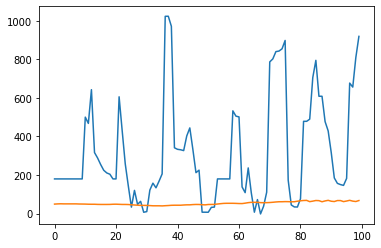

In [ ]:
plot_predictions1(model4, X2_test, y2_test)

In [ ]:
predictions = model4.predict(X2_test).flatten()
# df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':})

In [ ]:
print(predictions)

[196.52075 213.58063 233.3667  ... 215.63745 228.13379 217.28113]
